# IMPORT LIBRARIES

In [89]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rc
import plotly.graph_objs as go
from sklearn import preprocessing
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from IPython.display import Image
# import pydotplus
from sklearn.ensemble import RandomForestRegressor


# A.DATA SELECTION

# LOADING DATA

In [90]:
vehicles = pd.read_csv(r"D:\MSc DATAANALYTICS\FIRST SEMESTER\PROJECTS\DATAMINING AND MACHINE LEARNING\Used_cars_data\vehicles.csv") 
#reading the file

# B.DATA PRE-PROCESSING

# UNDERSTAND THE DATA

In [91]:
#viewing few rows of the dataset
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500,2003.0,chrysler,town & country,excellent,6 cylinders,...,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.614209,-85.326357
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590,2013.0,lincoln,mkz sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,...,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00F0F_ghX7UUlnBr...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000


In [92]:
#viewing the shape of the dataset
vehicles.shape

(441396, 25)

In [93]:
#viewing the information about the dataset
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441396 entries, 0 to 441395
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            441396 non-null  int64  
 1   url           441396 non-null  object 
 2   region        441396 non-null  object 
 3   region_url    441396 non-null  object 
 4   price         441396 non-null  int64  
 5   year          440359 non-null  float64
 6   manufacturer  423019 non-null  object 
 7   model         436057 non-null  object 
 8   condition     257554 non-null  object 
 9   cylinders     253231 non-null  object 
 10  fuel          438515 non-null  object 
 11  odometer      437018 non-null  float64
 12  title_status  432451 non-null  object 
 13  transmission  438769 non-null  object 
 14  VIN           277315 non-null  object 
 15  drive         307747 non-null  object 
 16  size          125812 non-null  object 
 17  type          346047 non-null  object 
 18  pain

In [94]:
#columns of the dataset
vehicles.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [95]:
#Removed the unnecessary columns that are irrelevant to the prediction

In [96]:
#drop the unnecessary columns
vehicles.drop(['id', 'url','region_url', 'VIN', 'image_url', 'lat', 'long', 'description'], axis=1, inplace=True)


In [97]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441396 entries, 0 to 441395
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        441396 non-null  object 
 1   price         441396 non-null  int64  
 2   year          440359 non-null  float64
 3   manufacturer  423019 non-null  object 
 4   model         436057 non-null  object 
 5   condition     257554 non-null  object 
 6   cylinders     253231 non-null  object 
 7   fuel          438515 non-null  object 
 8   odometer      437018 non-null  float64
 9   title_status  432451 non-null  object 
 10  transmission  438769 non-null  object 
 11  drive         307747 non-null  object 
 12  size          125812 non-null  object 
 13  type          346047 non-null  object 
 14  paint_color   308374 non-null  object 
 15  county        0 non-null       float64
 16  state         441396 non-null  object 
dtypes: float64(3), int64(1), object(13)
memory usage

# MISSING VALUES

In [98]:
print(vehicles.isnull().sum())

region               0
price                0
year              1037
manufacturer     18377
model             5339
condition       183842
cylinders       188165
fuel              2881
odometer          4378
title_status      8945
transmission      2627
drive           133649
size            315584
type             95349
paint_color     133022
county          441396
state                0
dtype: int64



# HANDLING MISSING VALUES

In [99]:
#Since the missing values are large in numbers, the columns with more than 55% of missingvalues are to be removed

In [100]:
null_val = vehicles.isna().sum()
def na_filter(na, threshold = .55): #only select variables that passess the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/vehicles.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
vehicles_cleaned = vehicles[na_filter(null_val)]
vehicles_cleaned.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [101]:
#UNIQUE VALUES OF THE COLUMN (different categories of categorical variables)

In [102]:
vehicles_cleaned.manufacturer.unique()

array(['chrysler', 'gmc', 'lincoln', 'ford', 'lexus', 'buick', 'jaguar',
       'toyota', 'mercedes-benz', 'volvo', nan, 'chevrolet', 'nissan',
       'infiniti', 'alfa-romeo', 'audi', 'hyundai', 'acura', 'jeep',
       'ram', 'bmw', 'mitsubishi', 'honda', 'subaru', 'pontiac',
       'volkswagen', 'dodge', 'fiat', 'cadillac', 'rover', 'kia',
       'porsche', 'mazda', 'tesla', 'mercury', 'mini', 'saturn', 'datsun',
       'land rover', 'ferrari', 'harley-davidson', 'aston-martin',
       'morgan'], dtype=object)

In [103]:
vehicles_cleaned.model.unique()

array(['town & country', 'acadia sle-2 sport utility', 'mkz sedan 4d',
       ..., 'f-250 crewcab', 'megacab 2500', 'quadcab 2500'], dtype=object)

In [104]:
vehicles_cleaned.cylinders.unique()

array(['6 cylinders', nan, '8 cylinders', '4 cylinders', 'other',
       '5 cylinders', '10 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

In [105]:
vehicles_cleaned.fuel.unique()

array(['gas', 'other', 'diesel', nan, 'electric', 'hybrid'], dtype=object)

In [106]:
vehicles_cleaned.title_status.unique()

array(['clean', 'rebuilt', 'lien', nan, 'missing', 'salvage',
       'parts only'], dtype=object)

In [107]:
vehicles_cleaned.transmission.unique()

array(['automatic', 'other', 'manual', nan], dtype=object)

In [108]:
vehicles_cleaned.drive.unique()

array(['fwd', '4wd', nan, 'rwd'], dtype=object)

In [109]:
vehicles_cleaned.type.unique()

array(['mini-van', 'other', 'sedan', 'pickup', 'hatchback', 'offroad',
       'bus', 'van', 'truck', 'SUV', 'coupe', nan, 'convertible', 'wagon'],
      dtype=object)

In [110]:
vehicles_cleaned.paint_color.unique()

array(['blue', 'white', 'red', nan, 'black', 'yellow', 'silver', 'brown',
       'orange', 'green', 'grey', 'custom', 'purple'], dtype=object)

In [111]:
#price, year, and odometer are numerical variables.

In [112]:
vehicles_cleaned.describe()

,price,year,odometer
count,4.413960e+05,440359.000000,4.370180e+05
mean,6.400219e+04,2011.491508,2.252556e+05
std,1.109241e+07,9.271752,1.601536e+07
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.950000e+03,2009.000000,3.942700e+04
50%,1.347750e+04,2014.000000,8.500000e+04
75%,2.499900e+04,2017.000000,1.310000e+05
max,3.736929e+09,2022.000000,2.000799e+09


In [113]:
#To handle the rest of the columns, drop the missing values

In [114]:
vehicles_df = vehicles_cleaned.dropna()

In [115]:
vehicles_df.shape

(116175, 15)

In [116]:
print(vehicles_df.isnull().sum())

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64


In [117]:
#The dataset contains 116175 rows and 15 columns now, left with no missing values

# HANDLING OUTLIERS

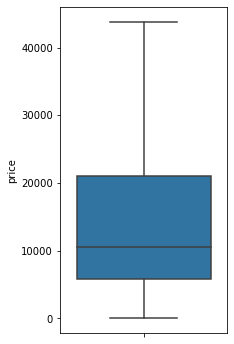

In [118]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=vehicles_df,showfliers=False);

In [119]:
vehicles_df.price.min()

0

In [120]:
vehicles_df.price.max()

3736928711

In [121]:
#Price of the vehicles can never be zero, So remove rows with price as 0

In [122]:
vehicles_df = vehicles_df[vehicles_df['price']>0]

In [123]:
vehicles_df.shape

(111624, 15)

In [124]:
#Removing the outliers of the price with IQR

In [125]:
y = vehicles_df['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

0          True
1          True
5          True
11         True
12         True
          ...  
441349     True
441367    False
441374    False
441383    False
441384     True
Name: price, Length: 111624, dtype: bool

In [126]:
print(removed_outliers.value_counts())

True     100466
False     11158
Name: price, dtype: int64


In [127]:
index_names = vehicles_df[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting 11158 prices to drop.

Int64Index([   143,    173,    279,    298,    309,    325,    400,    404,
               745,    753,
            ...
            441040, 441083, 441129, 441136, 441162, 441258, 441324, 441367,
            441374, 441383],
           dtype='int64', length=11158)


In [128]:
vehicles_df.drop(index_names, inplace=True)

In [129]:
vehicles_df.describe()

,price,year,odometer
count,100466.000000,100466.000000,1.004660e+05
mean,14486.541357,2009.627406,1.119136e+05
std,10079.312315,9.147299,1.727569e+05
min,2495.000000,1916.000000,0.000000e+00
25%,6500.000000,2007.000000,6.400000e+04
50%,10999.000000,2012.000000,1.042780e+05
75%,19995.000000,2015.000000,1.462732e+05
max,42549.000000,2022.000000,1.000000e+07


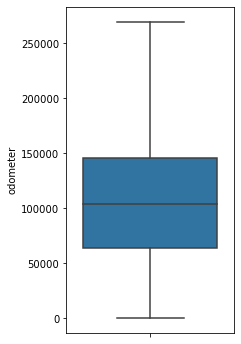

In [130]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=vehicles_df,showfliers=False);

In [131]:
vehicles_df.odometer.min()

0.0

In [132]:
vehicles_df.odometer.max()

10000000.0

In [133]:
vehicles_df = vehicles_df[vehicles_df['odometer']>0]

In [134]:
vehicles_df.shape

(100270, 15)

In [135]:
y = vehicles_df['odometer']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

0          True
1          True
5          True
11         True
12         True
          ...  
441333     True
441338     True
441339    False
441349     True
441384     True
Name: odometer, Length: 100270, dtype: bool

In [136]:
print(removed_outliers.value_counts())

True     90245
False    10025
Name: odometer, dtype: int64


In [137]:
vehicles_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,auburn,9500,2003.0,chrysler,town & country,excellent,6 cylinders,gas,30376.0,clean,automatic,fwd,mini-van,blue,al
1,auburn,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,fwd,other,white,al
5,auburn,20000,2011.0,ford,f-150 king ranch 4x4,good,8 cylinders,gas,101000.0,clean,automatic,4wd,pickup,black,al
11,auburn,18250,2008.0,toyota,fj cruiser,good,6 cylinders,gas,201300.0,clean,manual,4wd,offroad,black,al
12,auburn,6000,2007.0,mercedes-benz,e320 cdi,good,6 cylinders,diesel,124000.0,clean,automatic,rwd,sedan,blue,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441333,wyoming,37590,2020.0,cadillac,xt5 premium luxury,good,6 cylinders,gas,22107.0,clean,other,fwd,other,red,wy
441338,wyoming,31590,2017.0,dodge,durango citadel sport,good,8 cylinders,gas,43782.0,clean,other,rwd,SUV,white,wy
441339,wyoming,37590,2016.0,dodge,charger r/t scat pack,good,8 cylinders,gas,14797.0,clean,other,rwd,sedan,orange,wy
441349,wyoming,19900,2014.0,ford,f-150,excellent,8 cylinders,gas,96000.0,clean,automatic,4wd,pickup,white,wy


In [138]:
#CHANGE THE ORDER OF THE COLUMNS

In [139]:
vehicles_df = vehicles_df[['price','region','year','manufacturer','model','condition','cylinders','fuel','odometer',
                           'title_status','transmission','drive','type','paint_color','state']]

In [140]:
#checking the distribution of all the features with respect to target variable(price) for general understanding

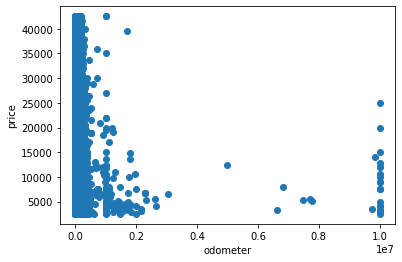

In [141]:
y = vehicles_df['price']
x = vehicles_df['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

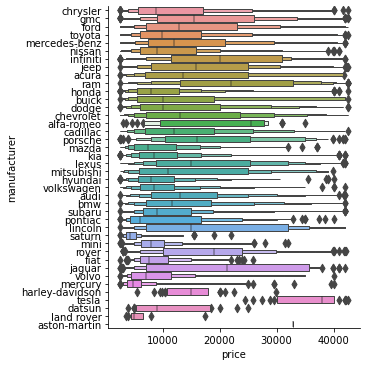

In [142]:
sns.catplot(y="manufacturer", x="price",kind="boxen", data=vehicles_df)

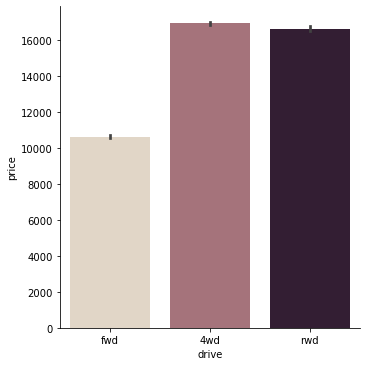

In [143]:
sns.catplot(x="drive", y="price",kind="bar", palette="ch:.25", data=vehicles_df)

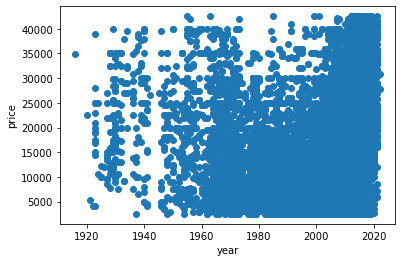

In [144]:
y = vehicles_df['price']
x = vehicles_df['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

<AxesSubplot:xlabel='fuel', ylabel='price'>

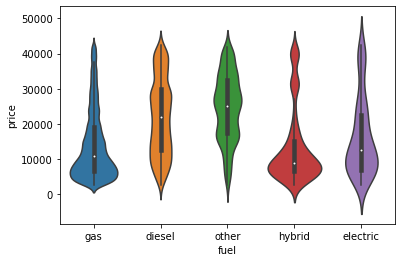

In [145]:
sns.violinplot(x=vehicles_df.fuel, y=vehicles_df.price)

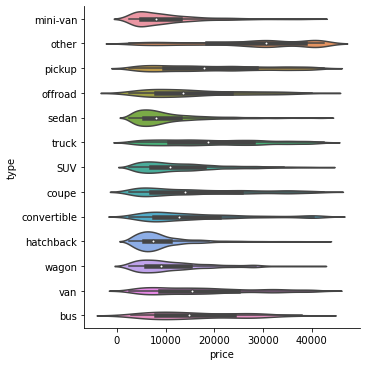

In [146]:
sns.catplot(y="type", x="price",kind="violin", data=vehicles_df)

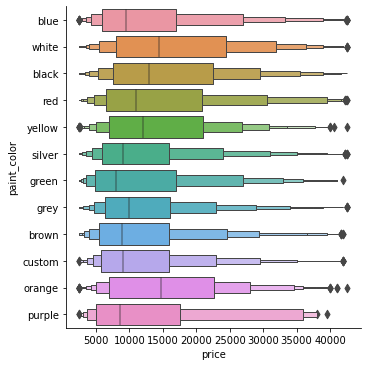

In [147]:
sns.catplot(x="price", y="paint_color", kind="boxen",
            data=vehicles_df)

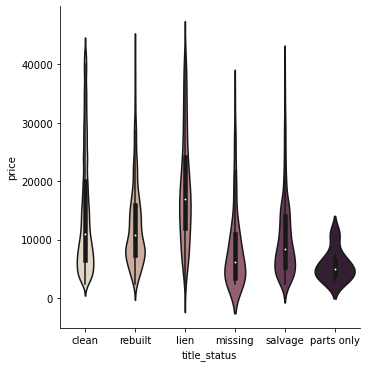

In [148]:
sns.catplot(x="title_status", y="price",kind="violin", palette="ch:.25", data=vehicles_df)

In [149]:
#we will use Label Encoder,since we have many categories for categorical variables. 
#Label encoding is simply converting each value in a column to a number.

In [150]:
le = preprocessing.LabelEncoder()

In [171]:
vehicles_df[['region','manufacturer','model','cylinders','condition','fuel','title_status','transmission','drive'
             ,'type','paint_color','state']] = vehicles_df[['region','manufacturer','model','cylinders','condition','fuel','title_status',
                                                            'transmission','drive','type','paint_color','state']].apply(le.fit_transform)

In [172]:
vehicles_df

,price,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,9500,16,2003.0,8,9483,0,5,2,0.055114,0,0,1,5,1,1
1,28990,16,2018.0,13,1253,2,5,2,0.045536,0,2,1,7,10,1
5,20000,16,2011.0,12,4240,2,6,2,0.100498,0,0,0,8,0,1
11,18250,16,2008.0,37,4881,2,5,2,0.141880,0,1,0,6,0,1
12,6000,16,2007.0,25,3491,2,5,0,0.111355,0,0,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441333,37590,396,2020.0,6,10375,2,5,2,0.047017,0,2,1,7,8,50
441338,31590,396,2017.0,10,3371,2,6,2,0.066167,0,2,2,0,10,50
441339,37590,396,2016.0,10,2407,2,6,2,0.038466,0,2,2,9,6,50
441349,19900,396,2014.0,12,4210,0,6,2,0.097979,0,0,0,8,10,50


In [173]:
#As we can see that odometer is a feature with larger magnitude.
#We need to reduce the scale of it to prevent from dominating the prediction model.
#In order to have fair glass to see all variables from the same lands, I have applied MinMaxScaler
#so prediction model will perform better.

In [174]:
from sklearn.preprocessing import MinMaxScaler
vehicles_df["odometer"] = np.sqrt(preprocessing.minmax_scale(vehicles_df["odometer"]))

In [175]:
vehicles_df

,price,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,9500,16,2003.0,8,9483,0,5,2,0.234763,0,0,1,5,1,1
1,28990,16,2018.0,13,1253,2,5,2,0.213391,0,2,1,7,10,1
5,20000,16,2011.0,12,4240,2,6,2,0.317015,0,0,0,8,0,1
11,18250,16,2008.0,37,4881,2,5,2,0.376669,0,1,0,6,0,1
12,6000,16,2007.0,25,3491,2,5,0,0.333699,0,0,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441333,37590,396,2020.0,6,10375,2,5,2,0.216834,0,2,1,7,8,50
441338,31590,396,2017.0,10,3371,2,6,2,0.257230,0,2,2,0,10,50
441339,37590,396,2016.0,10,2407,2,6,2,0.196126,0,2,2,9,6,50
441349,19900,396,2014.0,12,4210,0,6,2,0.313016,0,0,0,8,10,50


# VARIABLE SELECTION

In [176]:
#Here, Used three method for variable selection in Multiple Linear Regression and select the one with highest accuracy.

#1) Filter Method: As the name suggest,filtering and take subset of relevant features.
#done filtering using correlation matrix with Pearson Correlation.

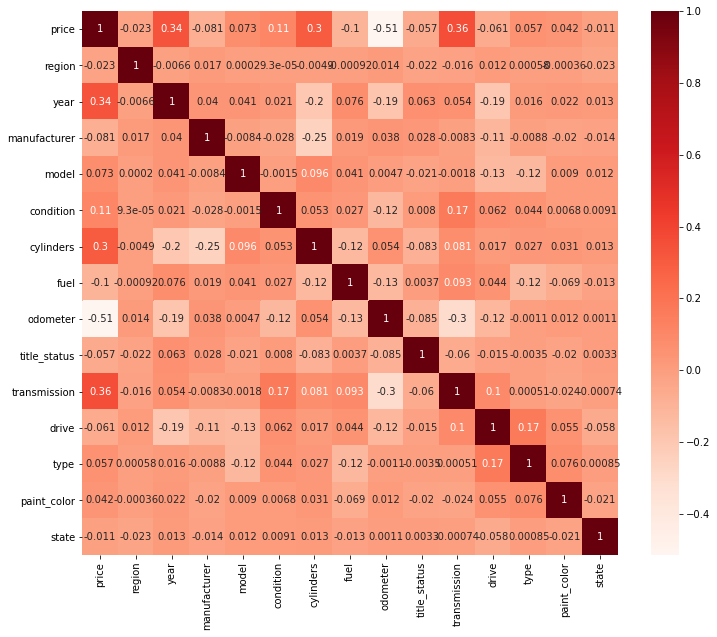

In [177]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = vehicles_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [178]:
#The heatmap that fuel, odometer, cylinders,transmission, and year have relatively high postive and negative relationship
#with price. 
#So we will drop the features apart from this.
#Multicollineraity means that the independent variables need to be uncorrelated with each other. 
#We also need to check if these variables are related with eachother.

In [179]:
print(vehicles_df[["fuel","odometer"]].corr())
print(vehicles_df[["odometer","cylinders"]].corr())
print(vehicles_df[["cylinders","transmission"]].corr())
print(vehicles_df[["transmission","year"]].corr())
print(vehicles_df[["year","fuel"]].corr())

              fuel  odometer
fuel      1.000000 -0.127541
odometer -0.127541  1.000000
           odometer  cylinders
odometer   1.000000   0.054038
cylinders  0.054038   1.000000
              cylinders  transmission
cylinders       1.00000       0.08095
transmission    0.08095       1.00000
              transmission      year
transmission      1.000000  0.054189
year              0.054189  1.000000
          year      fuel
year  1.000000  0.075989
fuel  0.075989  1.000000


In [180]:
features_p = vehicles_df[["fuel","odometer","cylinders","transmission","year"]]
target_p = vehicles_df[["price"]]

In [181]:
#splitting our dataset randomly with the test data containing 25% of the data,
x_train, x_test, y_train, y_test = train_test_split(features_p,target_p, 
                                                    test_size=0.25, 
                                                    random_state=0)

#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(x_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(x_test) ,'rows')

Our training prediction variable contains : 75202 rows
Our training independent variable contains : 75202 rows
Our testing prediction variable contains : 25068 rows
Our testing independent variable contains : 25068 rows


In [182]:
#run the regression model with Pearson Correlation method
reg_model_p = LinearRegression()

In [183]:
#fitting the training data to the model,
reg_model_p.fit(x_train, y_train)
#outputs the coefficients
print('Intercept :', reg_model_p.intercept_[0], '\n')
print(pd.DataFrame({'features':x_train.columns,'coeficients':reg_model_p.coef_[0]}))


Intercept : -690349.9036832931 

       features   coeficients
0          fuel  -3186.976654
1      odometer -72280.702581
2     cylinders   2773.923696
3  transmission   3657.911317
4          year    358.244061


In [184]:
#prediction
lr_pred_p = reg_model_p.predict(x_test)

In [185]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_p))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred_p))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_p)))

Mean Absolute Error: 5098.496123049874
Mean Squared Error: 48910518.26235574
Root Mean Squared Error: 6993.605526647591


In [186]:
score = r2_score(y_test, lr_pred_p)
score

0.5184503634172514

In [187]:
#2)Backward Elimination(Wrapper Method): This is an iterative and computationally expensive process but it is more accurate. 
#As the name suggest, we feed all the possible features to the model at first.
#We check the performance of the model and then iteratively remove the worst performing features 
#one by one till the overall performance of the model comes in acceptable range.
#The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [188]:
features = vehicles_df.loc[:,vehicles_df.columns!= 'price']
target = vehicles_df.loc[:,vehicles_df.columns == 'price']

In [189]:
#p values of all features.

In [190]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(features)
X_1
#Fitting sm.OLS model
model = sm.OLS(target,X_1).fit()  
model.pvalues

const            0.000000e+00
region           8.907229e-08
year             0.000000e+00
manufacturer     4.984775e-04
model            1.075354e-39
condition        1.214433e-03
cylinders        0.000000e+00
fuel             0.000000e+00
odometer         0.000000e+00
title_status    6.497168e-253
transmission     0.000000e+00
drive           3.643094e-264
type             8.028890e-66
paint_color      3.041106e-27
state            5.515186e-31
dtype: float64

In [191]:
#Backward Elimination
cols = list(features.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = features[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(target,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']


In [192]:
#Our final set of variables are shown above. It seems it has all the variables in dataset. Let's apply them into the model.

In [193]:
features_be = vehicles_df.loc[:,vehicles_df.columns != 'price']
target_be = vehicles_df.loc[:,vehicles_df.columns == 'price']

In [194]:
#splitting our dataset randomly with the test data containing 25% of the data,
X_train, X_test, y_train, y_test = train_test_split(features_be,target_be, 
                                                    test_size=0.25, 
                                                    random_state=0)

#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(X_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(X_test) ,'rows')

Our training prediction variable contains : 75202 rows
Our training independent variable contains : 75202 rows
Our testing prediction variable contains : 25068 rows
Our testing independent variable contains : 25068 rows


In [195]:
# run the regression model with backward elimination
reg_model_be = LinearRegression()

In [196]:
#fitting the training data to the model,
reg_model_be.fit(X_train, y_train)
#outputs the coefficients
print('Intercept :', reg_model_be.intercept_[0], '\n')
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model_be.coef_[0]}))

Intercept : -647908.6516964957 

        features   coeficients
0         region     -1.094973
1           year    337.689200
2   manufacturer      8.151439
3          model      0.097559
4      condition     65.118178
5      cylinders   2698.950439
6           fuel  -3068.402321
7       odometer -75281.855664
8   title_status   -809.712560
9   transmission   3627.929288
10         drive  -1036.796967
11          type     89.169374
12   paint_color     53.977722
13         state    -17.046206


In [197]:
lr_pred_be = reg_model_be.predict(X_test)

In [198]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_be))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred_be))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_be)))

Mean Absolute Error: 4983.636049533751
Mean Squared Error: 47506310.13263303
Root Mean Squared Error: 6892.482145978546


In [199]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lr_pred_be)
score

0.5322755269726118

In [200]:
#3) Recursive Feature Elimination(Wrapper Method):
#This method is recursively removing attributes and building a model on those attributes that remain.
#It uses accuracy metric to rank the feature according to their importance.

In [201]:
features = vehicles_df.loc[:,vehicles_df.columns != 'price']
target = vehicles_df.loc[:,vehicles_df.columns == 'price']

In [202]:
#no of features
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.25, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train.values.ravel())
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train.values.ravel())
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as pos

Optimum number of features: 14
Score with 14 features: 0.532276


In [203]:
#14 features give optimum score. Now let's figure out these 14 features.

In [204]:
cols = list(features.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 14)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(features,target.values.ravel())  
#Fitting the data to model
model.fit(X_rfe,target)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=14 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [205]:
features_rfe = vehicles_df[['region', 'year', 'manufacturer', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color','state']]
target_rfe = vehicles_df.loc[:,vehicles_df.columns == 'price']

In [206]:
#splitting our dataset randomly with the test data containing 25% of the data,
X_train, X_test, y_train, y_test = train_test_split(features_rfe,target_rfe, 
                                                    test_size=0.25, 
                                                    random_state=0)

#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(X_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(X_test) ,'rows')

Our training prediction variable contains : 75202 rows
Our training independent variable contains : 75202 rows
Our testing prediction variable contains : 25068 rows
Our testing independent variable contains : 25068 rows


In [207]:
# run the regression model for recursive feature elimination
reg_model_rfe = LinearRegression()

In [208]:
#fitting the training data to the model,
reg_model_rfe.fit(X_train, y_train)
#outputs the coefficients
print('Intercept :', reg_model_rfe.intercept_[0], '\n')
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model_rfe.coef_[0]}))

Intercept : -650232.9566835229 

        features   coeficients
0         region     -1.091418
1           year    339.095336
2   manufacturer      8.275083
3      cylinders   2728.175534
4           fuel  -3039.781523
5       odometer -75400.237457
6   title_status   -813.098918
7   transmission   3643.037410
8          drive  -1073.770800
9           type     83.067447
10   paint_color     55.459840
11         state    -16.985432


In [209]:
lr_pred_rfe = reg_model_rfe.predict(X_test)

In [210]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_rfe))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred_rfe))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_rfe)))

Mean Absolute Error: 4983.080726965739
Mean Squared Error: 47597414.44763672
Root Mean Squared Error: 6899.087943173121


In [211]:
score = r2_score(y_test, lr_pred_rfe)
score

0.5313785573362275

In [212]:
#Both backward elimination and recursive feature elimination are giving highest R value.

# APPLY ALGORITHM

In [213]:
#Decision Tree(CART)
#As we know that variable selection and reduction is automatic in CART, let's apply the algorithm.

In [214]:
x_final = vehicles_df[['region','year','manufacturer','model','cylinders','fuel','odometer','title_status','transmission','drive'
             ,'type','paint_color','state']]
y_final = vehicles_df[['price']]

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x_final,y_final, test_size = 0.25, random_state=0)
#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(x_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(x_test) ,'rows')

Our training prediction variable contains : 75202 rows
Our training independent variable contains : 75202 rows
Our testing prediction variable contains : 25068 rows
Our testing independent variable contains : 25068 rows


In [216]:
dtree = DecisionTreeRegressor()
model = dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)

In [217]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_1 <= 2014.50
|   |--- feature_4 <= 5.50
|   |   |--- feature_1 <= 2010.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_6 <= 0.33
|   |   |   |   |   |--- feature_1 <= 2004.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_10 <= 10.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1993.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [12500.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  1993.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [14300.00]
|   |   |   |   |   |   |   |   |   |--- feature_2 >  24.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 6605.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  6605.50
|   |   |   |   |   |   |   |   |   |   | 

In [218]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 2310.8540433210633
Mean Squared Error: 18861978.936981134
Root Mean Squared Error: 4343.037984749976


In [219]:
#As we know that full tree is always overfitted and this tree is also pretty long. 
#Let’s change a couple of parameters to see if there is any effect on the accuracy and also to make the tree shorter.

#Criterion: defines what function will be used to measure the quality of a split. 
#The options are "mse","mae", and "friedman mse".

#Max_depth: defines the maximum depth of the tree. 
#If it’s “none”, the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model)

In [ ]:
max_depth = []
acc_mse = []
acc_mae= []
acc_friedman_mse = []
for i in range(1,30):
    dtree = DecisionTreeRegressor(criterion='mse', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_mse.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    dtree = DecisionTreeRegressor(criterion='mae', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_mae.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    ####
    dtree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_friedman_mse.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    ####
    max_depth.append(i)
    d = pd.DataFrame({'acc_mse':pd.Series(acc_mse), 
    'acc_mae':pd.Series(acc_mae),
    'acc_friedman_mse':pd.Series(acc_friedman_mse),
    'max_depth':pd.Series(max_depth)})
                                                
# visualizing changes in parameters
plt.plot('max_depth','acc_mse', data=d, label='mse')
plt.plot('max_depth','acc_mae', data=d, label='mae')
plt.plot('max_depth','acc_friedman_mse', data=d, label='friedman_mse')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
dtree_m = DecisionTreeRegressor(criterion='mae',max_depth = 14)
model = dtree_m.fit(x_train, y_train)  #train parameters: features and target
pred = dtree_m.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


In [ ]:
rf = RandomForestRegressor(random_state=1).fit(x_train, y_train.values.ravel())
rf_pred = rf.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))